In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from keykeykeys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [47]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [48]:
weather_df = pd.DataFrame()
weather_df["City"]=cities
weather_df["Cloudiness"]=''
weather_df['Date']=''
weather_df['Humidity']=''
weather_df['Lat']=''
weather_df['Lng']=''
weather_df['Max Temp']=''
weather_df['Wind Speed']=''
weather_df

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,,,,,,,
1,jahrom,,,,,,,
2,hilo,,,,,,,
3,bluff,,,,,,,
4,chuy,,,,,,,
5,rikitea,,,,,,,
6,punta arenas,,,,,,,
7,tiksi,,,,,,,
8,halalo,,,,,,,
9,barrow,,,,,,,


In [49]:
url= "http://api.openweathermap.org/data/2.5/weather?"



In [50]:
# use iterrows to iterate through pandas dataframe
for index, row in weather_df.iterrows():

    # get restaurant type from df
    city = row['City']
    query_url = url + "appid=" + api_key + "&q=" + city

    # assemble url and make API request
    print(f"Retrieving Results for Index {index}: {city}.")
    weather_json = requests.get(query_url).json()
    
    try:
        
        weather_df.loc[index, 'Country']=weather_json['sys']['country']
        weather_df.loc[index, 'Cloudiness'] = weather_json['clouds']['all']
        weather_df.loc[index, 'Date'] = weather_json['dt']
        weather_df.loc[index, 'Humidity'] = weather_json['main']['humidity']
        weather_df.loc[index, 'Lat'] = weather_json['coord']['lat']
        weather_df.loc[index, 'Lng'] = weather_json['coord']['lon']
        weather_df.loc[index, 'Max Temp'] = weather_json['main']['temp_max']
        weather_df.loc[index, 'Wind Speed'] = weather_json['wind']['speed']
        time.sleep(1)            

    except (KeyError):
        print("Missing field/result... skipping.")
        

Retrieving Results for Index 0: mataura.
Retrieving Results for Index 1: jahrom.
Missing field/result... skipping.
Retrieving Results for Index 2: hilo.
Retrieving Results for Index 3: bluff.
Retrieving Results for Index 4: chuy.
Retrieving Results for Index 5: rikitea.
Retrieving Results for Index 6: punta arenas.
Retrieving Results for Index 7: tiksi.
Retrieving Results for Index 8: halalo.
Missing field/result... skipping.
Retrieving Results for Index 9: barrow.
Retrieving Results for Index 10: meulaboh.
Retrieving Results for Index 11: thompson.
Retrieving Results for Index 12: aleksandrov gay.
Retrieving Results for Index 13: sao joao da barra.
Retrieving Results for Index 14: hermanus.
Retrieving Results for Index 15: vaini.
Retrieving Results for Index 16: natal.
Retrieving Results for Index 17: portland.
Retrieving Results for Index 18: atuona.
Retrieving Results for Index 19: takoradi.
Retrieving Results for Index 20: chokurdakh.
Retrieving Results for Index 21: albany.
Retrie

Retrieving Results for Index 169: campo maior.
Retrieving Results for Index 170: butterworth.
Retrieving Results for Index 171: waiuku.
Retrieving Results for Index 172: mahebourg.
Retrieving Results for Index 173: herat.
Retrieving Results for Index 174: ilulissat.
Retrieving Results for Index 175: timizart.
Retrieving Results for Index 176: solsvik.
Missing field/result... skipping.
Retrieving Results for Index 177: bambous virieux.
Retrieving Results for Index 178: talakan.
Retrieving Results for Index 179: mahajanga.
Retrieving Results for Index 180: toktogul.
Retrieving Results for Index 181: capela do alto.
Retrieving Results for Index 182: puerto leguizamo.
Retrieving Results for Index 183: sampit.
Retrieving Results for Index 184: cherskiy.
Retrieving Results for Index 185: kununurra.
Retrieving Results for Index 186: parrita.
Retrieving Results for Index 187: nouakchott.
Retrieving Results for Index 188: gladstone.
Retrieving Results for Index 189: kuusamo.
Retrieving Results 

Retrieving Results for Index 338: arkhangelos.
Missing field/result... skipping.
Retrieving Results for Index 339: manzil salim.
Retrieving Results for Index 340: yuyao.
Retrieving Results for Index 341: batemans bay.
Retrieving Results for Index 342: poltavka.
Retrieving Results for Index 343: borama.
Missing field/result... skipping.
Retrieving Results for Index 344: mangrol.
Retrieving Results for Index 345: mana.
Retrieving Results for Index 346: merauke.
Retrieving Results for Index 347: kalachinsk.
Retrieving Results for Index 348: nicoya.
Retrieving Results for Index 349: digha.
Retrieving Results for Index 350: seminole.
Retrieving Results for Index 351: celano.
Retrieving Results for Index 352: lasa.
Retrieving Results for Index 353: petatlan.
Retrieving Results for Index 354: komsomolskiy.
Retrieving Results for Index 355: solnechnyy.
Retrieving Results for Index 356: mezhdurechensk.
Retrieving Results for Index 357: raga.
Missing field/result... skipping.
Retrieving Results 

Retrieving Results for Index 512: auki.
Retrieving Results for Index 513: krasnoselkup.
Missing field/result... skipping.
Retrieving Results for Index 514: nabire.
Retrieving Results for Index 515: kirov.
Retrieving Results for Index 516: traiguen.
Retrieving Results for Index 517: bam.
Retrieving Results for Index 518: kobryn.
Retrieving Results for Index 519: hrodna.
Retrieving Results for Index 520: pueblo.
Retrieving Results for Index 521: dublin.
Retrieving Results for Index 522: lavrentiya.
Retrieving Results for Index 523: kidal.
Retrieving Results for Index 524: sao miguel do araguaia.
Retrieving Results for Index 525: katobu.
Retrieving Results for Index 526: lensk.
Retrieving Results for Index 527: pinheiro machado.
Retrieving Results for Index 528: lata.
Retrieving Results for Index 529: tirau.
Retrieving Results for Index 530: dien bien.
Missing field/result... skipping.
Retrieving Results for Index 531: roma.
Retrieving Results for Index 532: orebro.
Retrieving Results for

In [51]:
weather_df.dropna(how='any', inplace=True)  
weather_df

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Country
0,mataura,64,1553274605,89,-46.19,168.86,288.71,1.21,NZ
2,hilo,90,1553274861,88,19.71,-155.08,292.15,2.1,US
3,bluff,48,1553274910,86,-23.58,149.07,294.613,2.76,AU
4,chuy,64,1553274911,92,-33.69,-53.46,292.913,2.31,UY
5,rikitea,64,1553274912,98,-23.12,-134.97,299.263,7.66,PF
6,punta arenas,75,1553274802,50,-53.16,-70.91,287.15,5.7,CL
7,tiksi,76,1553274916,75,71.64,128.87,258.063,2.46,RU
9,barrow,0,1553274918,52,-38.31,-60.23,295.713,6.76,AR
10,meulaboh,32,1553274919,100,4.14,96.13,300.413,1.66,ID
11,thompson,75,1553270400,63,55.74,-97.86,271.15,3.6,CA


In [52]:
weather_df.to_csv('weather_cities')

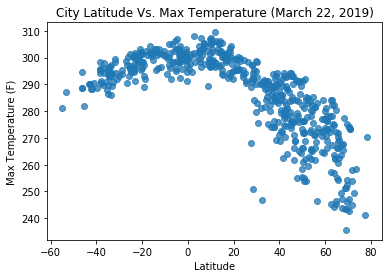

In [53]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker="o", alpha=0.75)

# add labels, title, legend, grid, and note
plt.title("City Latitude Vs. Max Temperature (March 22, 2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Lat_MaxTemp_Scatter.png", bbox_inches="tight")

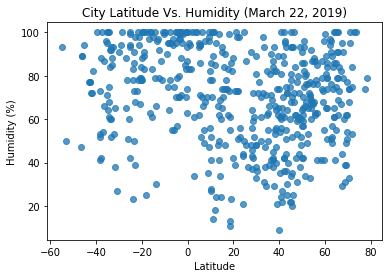

In [54]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker="o", alpha=0.75)

# add labels, title, legend, grid, and note
plt.title("City Latitude Vs. Humidity (March 22, 2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Lat_Humidity_Scatter.png", bbox_inches="tight")

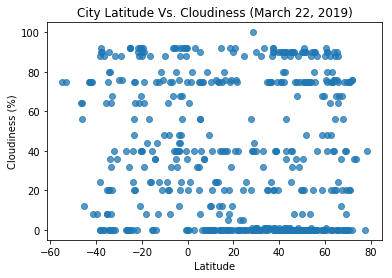

In [55]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker="o", alpha=0.75)

# add labels, title, legend, grid, and note
plt.title("City Latitude Vs. Cloudiness (March 22, 2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Lat_Cloud_Scatter.png", bbox_inches="tight")

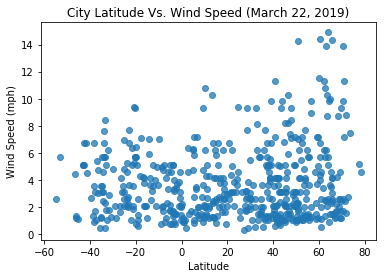

In [57]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker="o", alpha=0.75)

# add labels, title, legend, grid, and note
plt.title("City Latitude Vs. Wind Speed (March 22, 2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Lat_Windspeed_Scatter.png", bbox_inches="tight")